### Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
# Read the NBA play by play data into a DataFrame
df_23 = pd.read_csv('data/pbp2023.csv')
df_all = pd.read_csv('data/pbpALL.csv')

### Player Points

In [5]:
# Function to calculate points scored by each player in a given game
def points_scored_in_game(game_id):
    # Filter data for the given game_id
    game_df = df_all[df_all['gameid'] == game_id]

    # Initialize dictionaries to store points scored by each player
    player_points = {}
    
    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Iterate through each row in the filtered DataFrame
    for index, row in game_df.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']
            
            # Determine which team scored points
            if points_scored_home > 0:
                points_scored = points_scored_home
            elif points_scored_away > 0:
                points_scored = points_scored_away
            else:
                continue
                
            # Update points scored by the player
            if player_id in player_points:
                player_points[player_id]['points'] += points_scored
            else:
                player_points[player_id] = {'name': player_name, 'points': points_scored}
    return player_points

In [4]:
# Iterate through unique game IDs and calculate points scored by each player for each game
unique_game_ids = df_all['gameid'].unique()
all_player_points = {}

for game_id in unique_game_ids:
    points_scored = points_scored_in_game(game_id)
    all_player_points[game_id] = points_scored

# Print nicely formatted output
for game_id, player_points in all_player_points.items():
    print("Game ID:", game_id)
    for player_id, data in player_points.items():
        print("Player Name:", data['name'], "| Points Scored:", data['points'])
    print("\n")

Game ID: 22200001
Player Name: M. Smart | Points Scored: 14.0
Player Name: T. Harris | Points Scored: 18.0
Player Name: J. Tatum | Points Scored: 35.0
Player Name: J. Embiid | Points Scored: 26.0
Player Name: J. Harden | Points Scored: 35.0
Player Name: T. Maxey | Points Scored: 21.0
Player Name: G. Williams | Points Scored: 15.0
Player Name: J. Brown | Points Scored: 35.0
Player Name: B. Griffin | Points Scored: 1.0
Player Name: M. Brogdon | Points Scored: 16.0
Player Name: D. House Jr. | Points Scored: 1.0
Player Name: D. Melton | Points Scored: 5.0
Player Name: N. Vonleh | Points Scored: 2.0
Player Name: P. Tucker | Points Scored: 6.0
Player Name: A. Horford | Points Scored: 6.0
Player Name: M. Harrell | Points Scored: 2.0
Player Name: D. White | Points Scored: 2.0
Player Name: G. Niang | Points Scored: 3.0


Game ID: 22200002
Player Name: A. Davis | Points Scored: 27.0
Player Name: K. Thompson | Points Scored: 18.0
Player Name: K. Looney | Points Scored: 7.0
Player Name: S. Curry |

In [6]:
# Function to calculate points scored by a specific player in each game
def points_scored_by_player(player_identifier,df,start_year,end_year):
    # Filter the dataframe for the given year range
    df_filtered = df[(df['season'] >= start_year) & (df['season'] <= end_year)]

    # Sort so that everything is in order
    df_filtered = df_filtered.sort_values(by=['gameid', 'period', 'clock'], ascending=[True, True, False])

    # Drop rows where 'gameid' is equal to '49600063'
    df_filtered = df_filtered[df_filtered['gameid'] != 49600063]

    # Export the sorted DataFrame to a CSV file
    df_filtered.to_csv('sorted_dataframe.csv', index=False)

    # Initialize a dictionary to store points scored by the player in each game
    player_points_by_game = {}

    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Get the game ID for the first row
    game_id = df_filtered.iloc[0]['gameid']

    # Iterate through each row in the filtered DataFrame
    for index, row in df_filtered.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']
        
        # address game change
        if row['gameid'] != game_id:
            running_h_pts = h_pts
            running_a_pts = a_pts
            game_id = row['gameid']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts) and (h_pts > running_h_pts or a_pts > running_a_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']

            if player_identifier in (player_name, player_id):
                # Get game id
                game_id = row['gameid']
            
                # Determine which team scored points
                if points_scored_home > 0:
                    points_scored = points_scored_home
                elif points_scored_away > 0:
                    points_scored = points_scored_away
                else:
                    continue
                
                # Update points scored by the player in the corresponding game
                if game_id in player_points_by_game:
                    player_points_by_game[game_id] += points_scored
                else:
                    player_points_by_game[game_id] = points_scored
            
    # Print the points scored by the player in each game
    for game_id, points_scored in player_points_by_game.items():
        print("Game ID:", game_id, "| Points Scored by", player_identifier, ":", points_scored)

    return player_points_by_game

Game ID: 22200006 | Points Scored by K. Durant : 32.0
Game ID: 22200021 | Points Scored by K. Durant : 27.0
Game ID: 22200049 | Points Scored by K. Durant : 37.0
Game ID: 22200060 | Points Scored by K. Durant : 33.0
Game ID: 22200066 | Points Scored by K. Durant : 37.0
Game ID: 22200083 | Points Scored by K. Durant : 26.0
Game ID: 22200098 | Points Scored by K. Durant : 36.0
Game ID: 22200103 | Points Scored by K. Durant : 32.0
Game ID: 22200123 | Points Scored by K. Durant : 28.0
Game ID: 22200133 | Points Scored by K. Durant : 27.0
Game ID: 22200155 | Points Scored by K. Durant : 26.0
Game ID: 22200164 | Points Scored by K. Durant : 29.0
Game ID: 22200184 | Points Scored by K. Durant : 27.0
Game ID: 22200198 | Points Scored by K. Durant : 31.0
Game ID: 22200210 | Points Scored by K. Durant : 27.0
Game ID: 22200221 | Points Scored by K. Durant : 35.0
Game ID: 22200243 | Points Scored by K. Durant : 26.0
Game ID: 22200256 | Points Scored by K. Durant : 20.0
Game ID: 22200266 | Points S

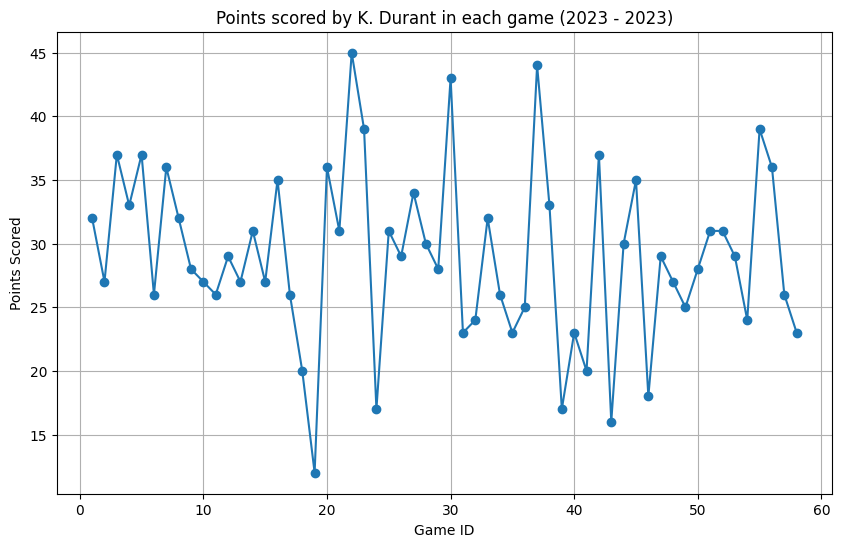

In [17]:
# Example usage:
# Specify the player's name or ID as input
player_identifier = 'K. Durant'
start_year = 2023
end_year = 2023

player_points_by_game = points_scored_by_player(player_identifier, df_all, start_year, end_year)
extracted = player_points_by_game.items()

# Extract game ids and points scored for plotting
game_ids = list(player_points_by_game.keys())
game_indices = range(1, len(game_ids) + 1)  # Using numerical indices starting from 1
points = list(player_points_by_game.values())

# Plot points scored by the player in each game
plt.figure(figsize=(10, 6))
plt.plot(game_indices, points, marker='o', linestyle='-')
plt.title(f"Points scored by {player_identifier} in each game ({start_year} - {end_year})")
plt.xlabel('Game ID')
plt.ylabel('Points Scored')
plt.grid(True)

plt.savefig(f"{player_identifier.replace(' ', '').replace('.', '')}_{start_year}_{end_year}_points")
plt.show()

In [30]:
# Function to calculate points scored by a specific player in each game
def median_points_by_year(player_identifier, df, start_year, end_year):
     # Filter the dataframe for the given year range
    df_filtered = df[(df['season'] >= start_year) & (df['season'] <= end_year)]

    # Sort so that everything is in order
    df_filtered = df_filtered.sort_values(by=['gameid', 'period', 'clock'], ascending=[True, True, False])

    # Drop rows where 'gameid' is equal to '49600063'
    df_filtered = df_filtered[df_filtered['gameid'] != 49600063]

    # Export the sorted DataFrame to a CSV file
    df_filtered.to_csv('sorted_dataframe.csv', index=False)

    # Initialize a dictionary to store points scored by the player in each game
    player_points_by_game = {}

    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Get the game ID for the first row
    game_id = df_filtered.iloc[0]['gameid']

    # Iterate through each row in the filtered DataFrame
    for index, row in df_filtered.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']
        
        # address game change
        if row['gameid'] != game_id:
            running_h_pts = h_pts
            running_a_pts = a_pts
            game_id = row['gameid']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts) and (h_pts > running_h_pts or a_pts > running_a_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']

            if player_identifier in (player_name, player_id):
                # Get game id
                game_id = row['gameid']
            
                # Determine which team scored points
                if points_scored_home > 0:
                    points_scored = points_scored_home
                elif points_scored_away > 0:
                    points_scored = points_scored_away
                else:
                    continue
                
                # Update points scored by the player in the corresponding game
                if game_id in player_points_by_game:
                    player_points_by_game[game_id] += points_scored
                else:
                    player_points_by_game[game_id] = points_scored
    
    # Create a dictionary to store the points scored by the player in each year
    points_by_year = {}

    # Iterate over the points scored in each game and group them by year
    for game_id, points_scored in player_points_by_game.items():
        # Get the year of the game
        year = df_filtered[df_filtered['gameid'] == game_id].iloc[0]['season']
        
        # Append the points to the list of points for the corresponding year
        if year in points_by_year:
            points_by_year[year].append(points_scored)
        else:
            points_by_year[year] = [points_scored]
    
    # Calculate the median points for each year
    median_points_by_year = {year: np.median(points) for year, points in points_by_year.items()}

    return median_points_by_year


In [ ]:
def plot_median_points(median_points, player_identifier):
    # Sort the dictionary by year
    sorted_years = sorted(median_points.keys())
    sorted_medians = [median_points[year] for year in sorted_years]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_years, sorted_medians, marker='o', linestyle='-', color='b')

    # Add titles and labels
    plt.title(f'Median Points Scored by {player_identifier} Per Year')
    plt.xlabel('Year')
    plt.ylabel('Median Points')
    plt.grid(True)

    # Save the plot as a file
    plt.savefig(f'median_points_{player_identifier}.png')

    # Show the plot
    plt.show()

In [ ]:
# THIS TAKES FOREVER TO RUN SO DONT RUN IT IT IS NOT NECESSARY SINCE WE HAVE THE GRAPHS
median_points_LJames = median_points_by_year('L. James', df_all, 2004, 2023)

median_points_KBryant = median_points_by_year('K. Bryant', df_all, 1997, 2016)

median_points_DNowitzki = median_points_by_year('D. Nowitzki', df_all, 1999, 2019)

median_points_TDuncan = median_points_by_year('T. Duncan', df_all, 1998, 2016)

median_points_KDurant = median_points_by_year('K. Durant', df_all, 2008, 2023)

In [ ]:
plot_median_points(median_points_LJames, 'L. James')
plot_median_points(median_points_KBryant, 'K. Bryant')
plot_median_points(median_points_DNowitzki, 'D. Nowitzki')
plot_median_points(median_points_TDuncan, 'T. Duncan')
plot_median_points(median_points_KDurant, 'K. Durant')


In [ ]:
def plot_median_points_comparison(players_median_points):
    plt.figure(figsize=(14, 8))
    
    # Iterate over each player's median points data
    for player_identifier, median_points in players_median_points.items():
        # Sort the dictionary by year
        sorted_years = sorted(median_points.keys())
        sorted_medians = [median_points[year] for year in sorted_years]

        # Plot the data for each player
        plt.plot(sorted_years, sorted_medians, marker='o', linestyle='-', label=player_identifier)

    # Add titles and labels
    plt.title('Median Points Scored by Players Per Year')
    plt.xlabel('Year')
    plt.ylabel('Median Points')
    plt.grid(True)
    plt.legend()

    # Save the plot as a file
    plt.savefig('median_points_comparison.png')

    # Show the plot
    plt.show()

# Example usage
players_median_points = {
    'L. James': median_points_LJames,
    'K. Bryant': median_points_KBryant,
    'D. Nowitzki': median_points_DNowitzki,
    'T. Duncan': median_points_TDuncan,
    'K. Durant': median_points_KDurant
}

plot_median_points_comparison(players_median_points)

### Turnover Plots

In [51]:
# Filter to include only turnovers
turnovers_df = df_all[df_all['type'] == 'Turnover']

# Group by team and season, count turnovers
turnovers_count = turnovers_df.groupby(['team', 'season']).size().reset_index(name='turnovers')

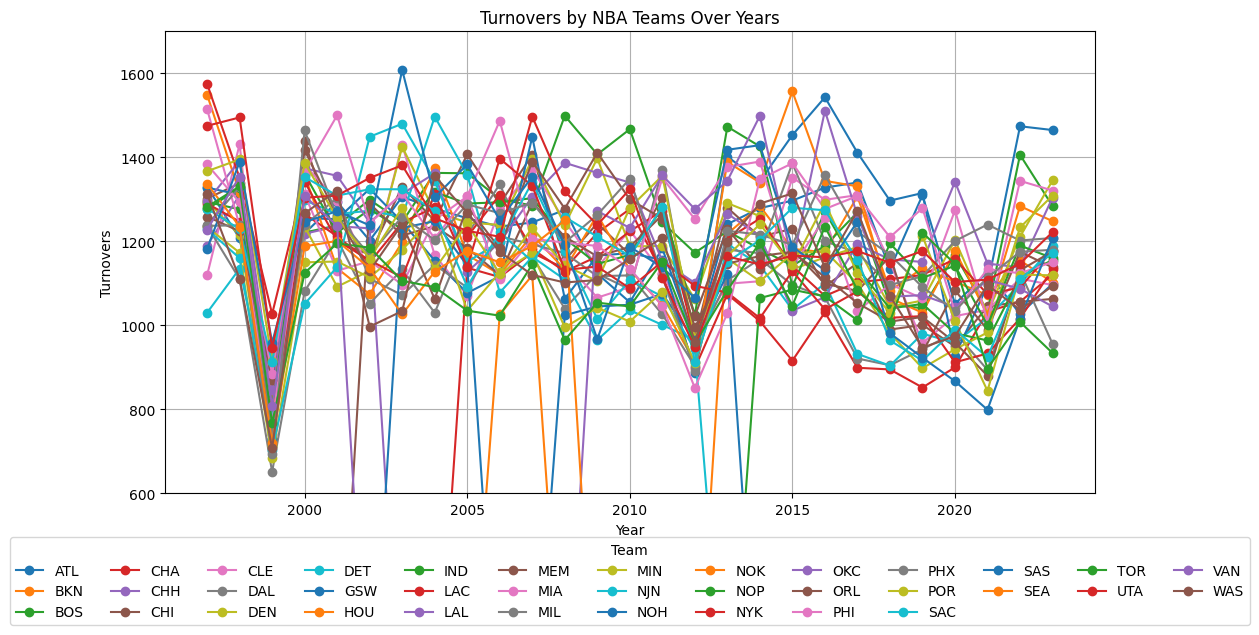

In [58]:
# Pivot the DataFrame for plotting
pivot_table = turnovers_count.pivot(index='season', columns='team', values='turnovers').fillna(0)

pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Turnovers by NBA Teams Over Years')
plt.xlabel('Year')
plt.ylabel('Turnovers')
plt.legend(title='Team', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=13)
plt.grid(True)
plt.ylim(600, 1700)

plt.savefig('total_turnovers')
plt.show()

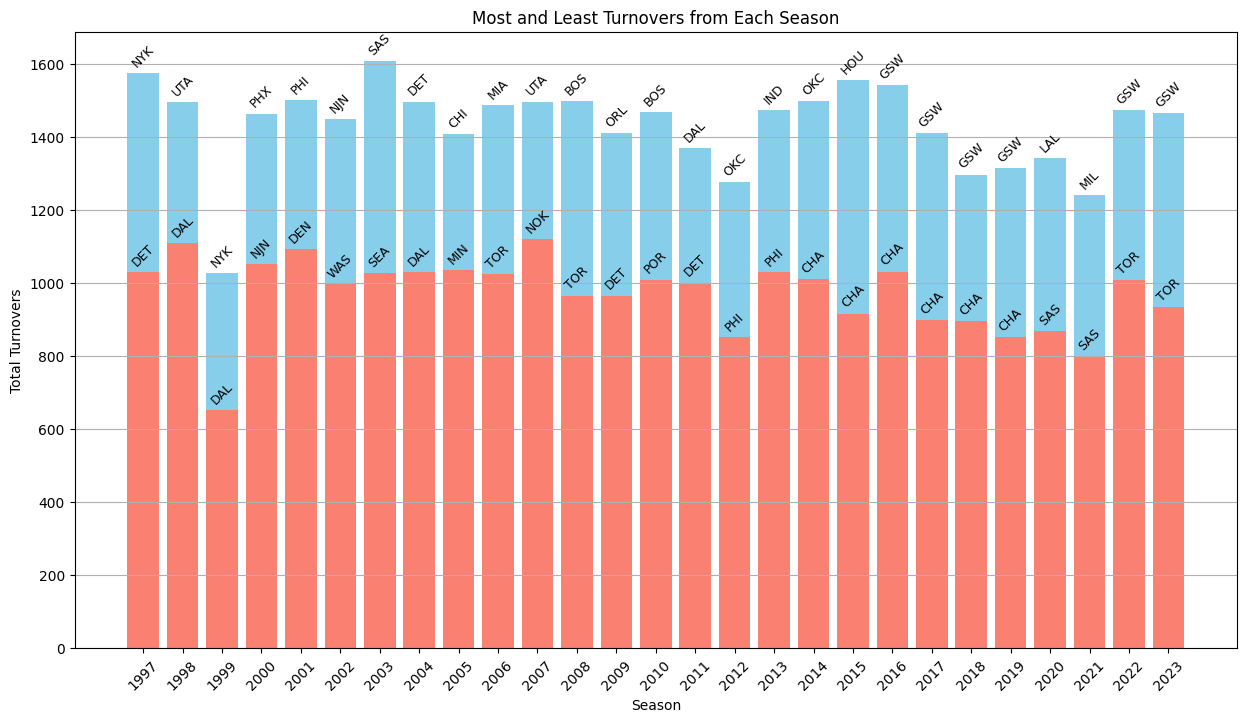

In [57]:
top_teams_per_season = turnovers_count.loc[turnovers_count.groupby('season')['turnovers'].idxmax()]
bottom_teams_per_season = turnovers_count.loc[turnovers_count.groupby('season')['turnovers'].idxmin()]

# Plotting the top turnover teams per season
plt.figure(figsize=(15, 8))
bars_top = plt.bar(top_teams_per_season['season'].astype(str), top_teams_per_season['turnovers'], color='skyblue')

# Annotate bars with team names
for bar, team in zip(bars_top, top_teams_per_season['team']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, team, ha='center', va='bottom', rotation=45, fontsize=9)

# Plotting bottom top turnover teams per season
bars_bottom = plt.bar(bottom_teams_per_season['season'].astype(str), bottom_teams_per_season['turnovers'], color='salmon')

# Annotate bars with team names
for bar, team in zip(bars_bottom, bottom_teams_per_season['team']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, team, ha='center', va='bottom', rotation=45, fontsize=9)

plt.title('Most and Least Turnovers from Each Season')
plt.xlabel('Season')
plt.ylabel('Total Turnovers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('season_turnovers')
plt.show()

### Made Shot Map

In [54]:
# Filter rows where 'x' and 'y' are not both 0 and 'result' is 'Made'
filtered_df = df_all[(df_all['x'] != 0) & (df_all['y'] != 0) & (df_all['result'] == 'Made')]

# Calculate z-scores for 'x' and 'y'
z_scores_x = np.abs((filtered_df['x'] - filtered_df['x'].mean()) / filtered_df['x'].std())
z_scores_y = np.abs((filtered_df['y'] - filtered_df['y'].mean()) / filtered_df['y'].std())

# Define threshold for outliers (e.g., z-score > 3)
threshold = 3

# Remove rows with outliers
filtered_df = filtered_df[(z_scores_x < threshold) & (z_scores_y < threshold)]

# Extract columns 'x', 'y', and 'year'
selected_columns = ['x', 'y', 'season']
data = filtered_df[selected_columns]

# Sample data points from each year
sampled_data = data.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed

# Convert the DataFrame to a list of tuples
data_tuples = [tuple(x) for x in sampled_data.values]

# Unpack the tuples
x_values, y_values, years = zip(*data_tuples)

# Get unique years
unique_years = sorted(set(years))

# Create a color map
color_map = plt.cm.get_cmap('viridis', len(unique_years))

/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/3608664263.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/3608664263.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_years))


In [55]:
from matplotlib.patches import Arc

def draw_three_point_line(ax):
    # Semicircle part (radius 237.5 feet)
    three_point_radius = 237.5
    
    # Limit the theta range of the arc to not overlap with the straight lines
    theta1 = 22.5  # Starting angle in degrees
    theta2 = 157.5  # Ending angle in degrees
    semicircle = Arc((0, 0), 2*three_point_radius, 2*three_point_radius, theta1=theta1, theta2=theta2, color='blue', linewidth=2.5)

    # Add the semicircle to the plot
    ax.add_patch(semicircle)

    # Straight line parts (220 feet at the corners)
    corner_distance = 220
    ax.plot([-corner_distance, -corner_distance], [0, 90], color='blue', linewidth=2.5)
    ax.plot([corner_distance, corner_distance], [0, 90], color='blue', linewidth=2.5)

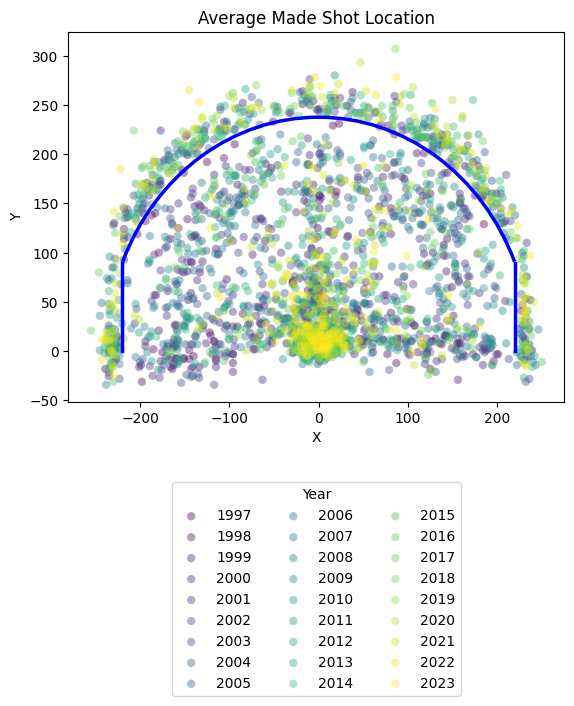

In [56]:
# Plot
fig, ax = plt.subplots()

for year in unique_years:
    indices = [i for i, y in enumerate(years) if y == year]
    ax.scatter([x_values[i] for i in indices], [y_values[i] for i in indices], color=color_map(unique_years.index(year)), alpha=0.4, edgecolors='none', marker='o', label=str(year))

draw_three_point_line(ax)

# Customize plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Average Made Shot Location')

# Move legend under the graph
ax.legend(title='Year', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.savefig("average_shot_location")
plt.show()

### Top N Scoring Players for Select Years

In [2]:
def top_scoring_players(df, start_year, end_year, top_n=5):
    # Filter the dataframe for the given year range
    df_filtered = df[(df['season'] >= start_year) & (df['season'] <= end_year)]

    # Sort so that everything is in order
    df_filtered = df_filtered.sort_values(by=['gameid', 'period', 'clock'], ascending=[True, True, False])

    # Drop rows where 'gameid' is equal to '49600063'
    df_filtered = df_filtered[df_filtered['gameid'] != 49600063]
    
    # Dictionary to hold total points scored by each player
    player_total_points = {}

    running_h_pts = 0
    running_a_pts = 0

    # Get the game ID for the first row
    game_id = df_filtered.iloc[0]['gameid']

    # Iterate through each row in the filtered DataFrame
    for index, row in df_filtered.iterrows():
        player_name = row['player']
        player_id = row['playerid']
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        # address game change
        if row['gameid'] != game_id:
            running_h_pts = h_pts
            running_a_pts = a_pts
            game_id = row['gameid']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts) and (h_pts > running_h_pts or a_pts > running_a_pts):
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts

            running_h_pts = h_pts
            running_a_pts = a_pts

            # Determine which team scored points
            if points_scored_home > 0:
                points_scored = points_scored_home
            elif points_scored_away > 0:
                points_scored = points_scored_away       
            else:
                continue

            if player_id in player_total_points:
                player_total_points[player_id]['points'] += points_scored
            else:
                player_total_points[player_id] = {'name': player_name, 'points': points_scored}
            
                
    # Sort players by total points scored
    sorted_players = sorted(player_total_points.items(), key=lambda item: item[1]['points'], reverse=True)

    print("h points", running_h_pts)
    print("a points", running_a_pts)
    
    # Get top N players
    top_players = sorted_players[:top_n]
    
    for player_id, points in top_players:
        print(f"Player ID: {player_id} | Total Points: {points}")
    
    return top_players

In [9]:
start_year = 2016
end_year = 2023
top_n = 5

top_scoring_players(df_all, start_year, end_year, top_n)

h points 120.0
a points 95.0
Player ID: 201935 | Total Points: {'name': 'J. Harden', 'points': 17153.0}
Player ID: 203507 | Total Points: {'name': 'G. Antetokounmpo', 'points': 16273.0}
Player ID: 2544 | Total Points: {'name': 'L. James', 'points': 16162.0}
Player ID: 201939 | Total Points: {'name': 'S. Curry', 'points': 15614.0}
Player ID: 203081 | Total Points: {'name': 'D. Lillard', 'points': 15315.0}


[(201935, {'name': 'J. Harden', 'points': 17153.0}),
 (203507, {'name': 'G. Antetokounmpo', 'points': 16273.0}),
 (2544, {'name': 'L. James', 'points': 16162.0}),
 (201939, {'name': 'S. Curry', 'points': 15614.0}),
 (203081, {'name': 'D. Lillard', 'points': 15315.0})]

### Distribution of Points for Top Players

In [46]:
# Define player IDs and corresponding names
top_all_time = {
    2544: 'L. James',
    977: 'K. Bryant',
    1717: 'D. Nowitzki',
    1495: 'T. Duncan',
    201142: 'K. Durant'
}

top_1997_2005 = {
    406: "S. O'Neal",
    947: "A. Iverson",
    977: "K. Bryant",
    708: "K. Garnett",
    1495: "T. Duncan"
}

top_2006_2015 = {
    2544: "L. James",
    977: 'K. Bryant',
    1717: 'D. Nowitzki',
    2546: "C. Anthony",
    2548: "D. Wade"
}

top_2016_2023 = {
    2544: 'L. James',
    201935: 'J. Harden',
    203507: 'G. Antetokounmpo',
    201939: 'S. Curry',
    203081: 'D. Lillard'
}

In [44]:
def show_top_players(id_table,filename):
    num_players = len(id_table)
    fig, axes = plt.subplots(1, num_players, figsize=(20, 5), sharex=True, sharey=True)
    axes = axes.flatten()  # Ensure axes is a flat array even if num_players is 1

    # Iterate over player IDs and names
    for idx, (player_id, player_name) in enumerate(id_table.items()):
        ax = axes[idx]
        # Filter rows for the current player where 'x' and 'y' are not both 0 and 'result' is 'Made'
        filtered_df_player = df_all[(df_all['player'] == player_name) & (df_all['x'] != 0) & (df_all['y'] != 0) & (df_all['result'] == 'Made')]

        # Calculate z-scores for 'x' and 'y'
        z_scores_x = np.abs((filtered_df_player['x'] - filtered_df_player['x'].mean()) / filtered_df_player['x'].std())
        z_scores_y = np.abs((filtered_df_player['y'] - filtered_df_player['y'].mean()) / filtered_df_player['y'].std())

        # Define threshold for outliers (e.g., z-score > 3)
        threshold = 3

        # Remove rows with outliers
        filtered_df_player = filtered_df_player[(z_scores_x < threshold) & (z_scores_y < threshold)]

        # Extract columns 'x', 'y', and 'season'
        selected_columns = ['x', 'y', 'season']
        data_player = filtered_df_player[selected_columns]

        # Sample data points from each year
        sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed

        # Convert the DataFrame to a list of tuples
        data_tuples_player = [tuple(x) for x in sampled_data_player.values]

        # Unpack the tuples
        x_values_player, y_values_player, years_player = zip(*data_tuples_player)

        # Get unique years
        unique_years_player = sorted(set(years_player))

        # Create a color map
        color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))

        draw_three_point_line(ax)

        # Plot
        for year in unique_years_player:
            indices = [i for i, y in enumerate(years_player) if y == year]
            ax.scatter([x_values_player[i] for i in indices], [y_values_player[i] for i in indices], color=color_map_player(unique_years_player.index(year)), alpha=0.4, edgecolors='none', marker='o', label=str(year))

        # Customize plot
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_title(f'Made Shot Map - {player_name}')

        # Move legend under the graph
        ax.legend(title='Year', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

    plt.tight_layout()
    name='made_shots_' + filename
    plt.savefig(name)
    plt.show()

/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_985

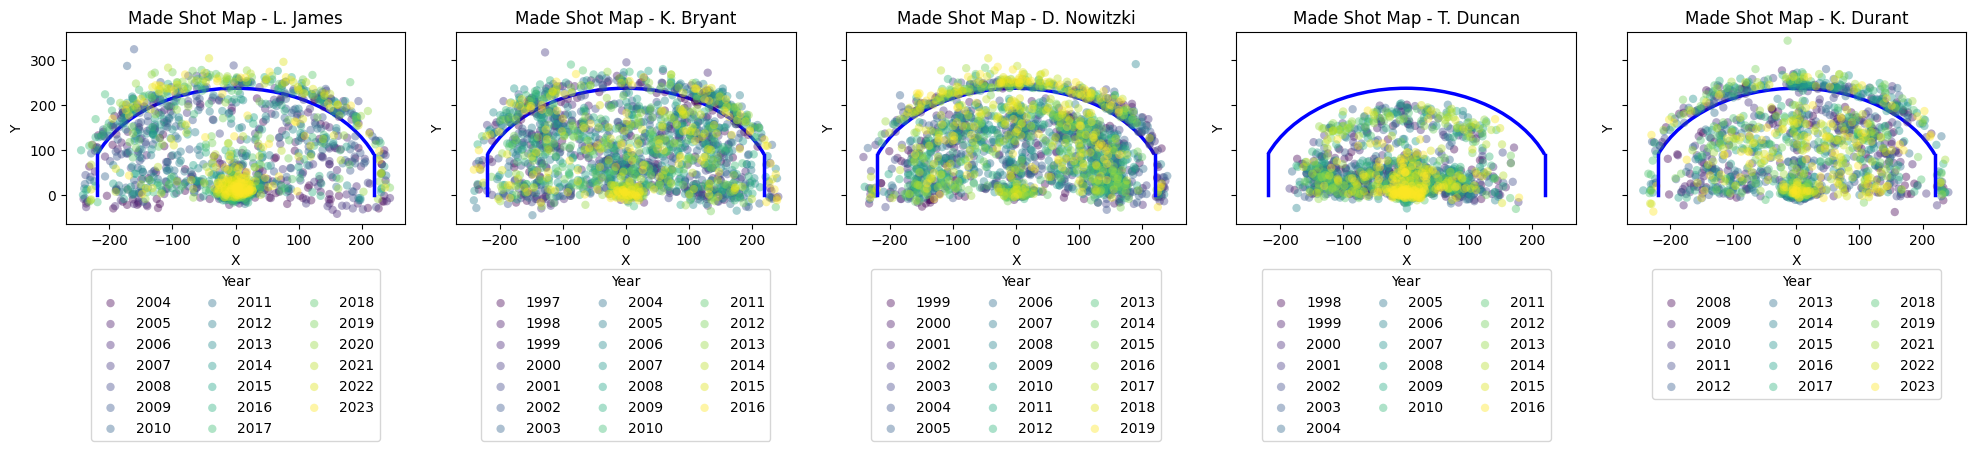

/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_985

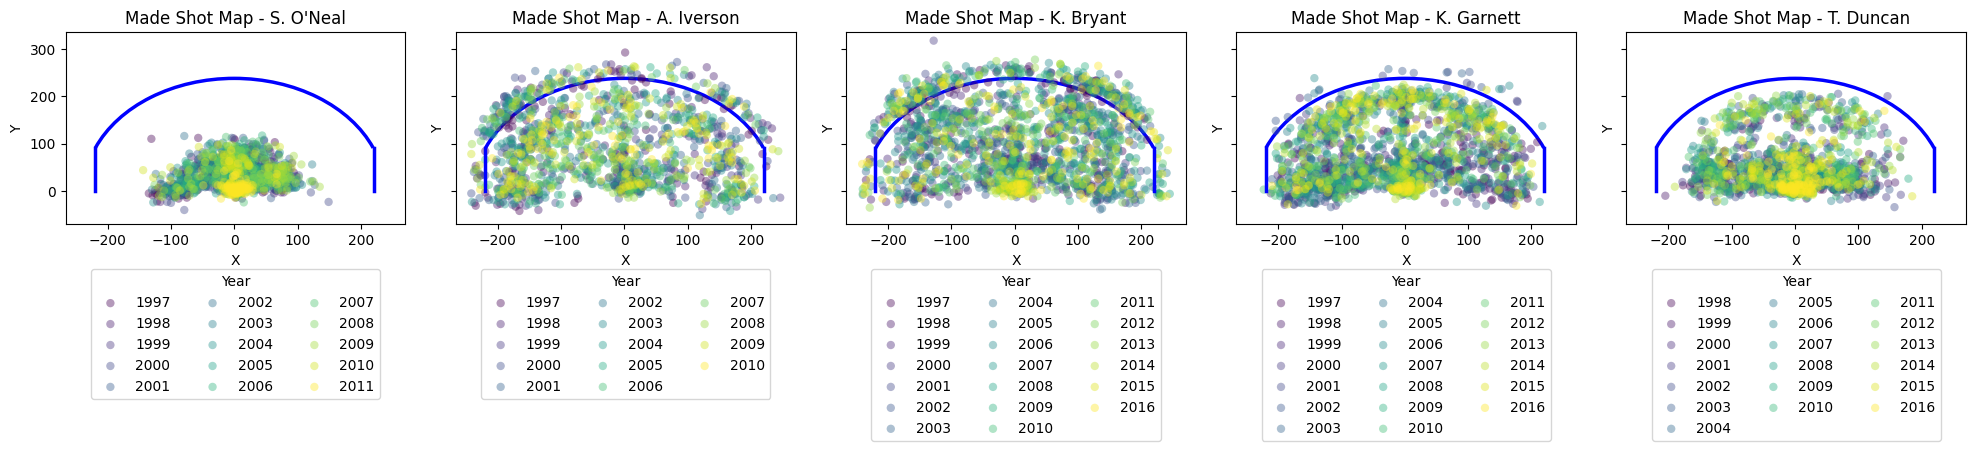

/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_985

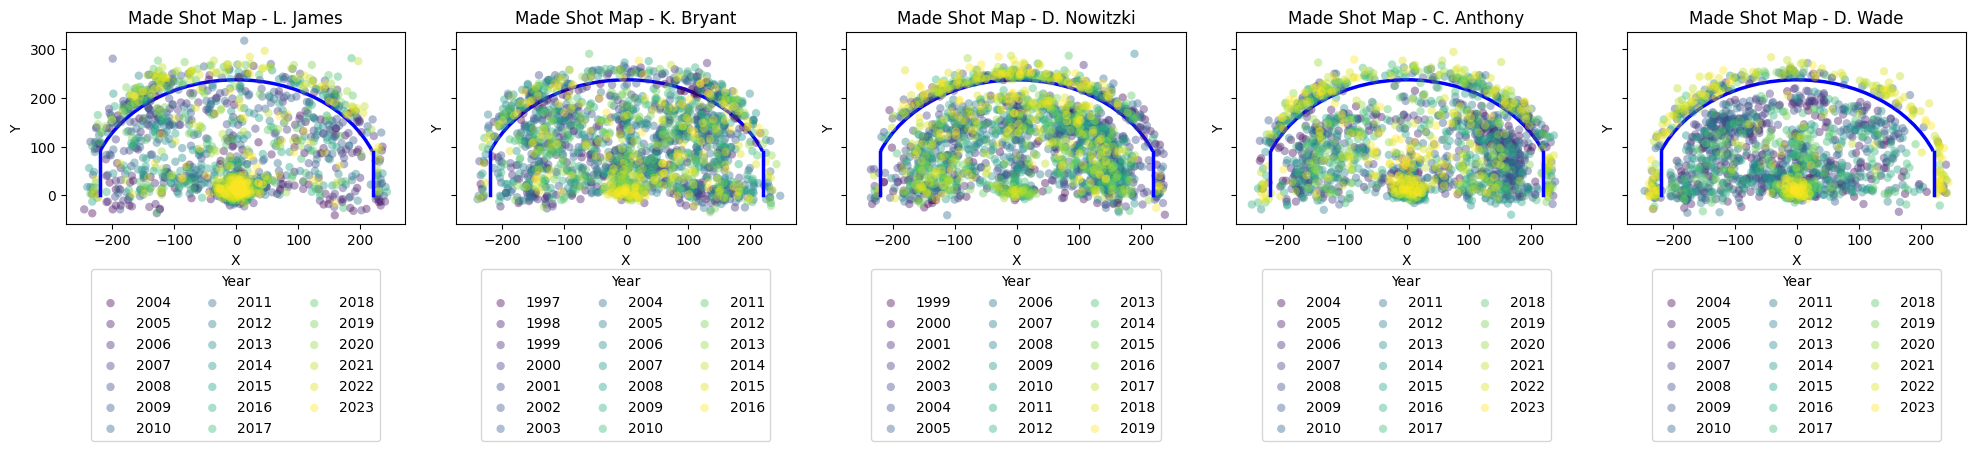

/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data_player = data_player.groupby('season').apply(lambda x: x.sample(n=min(100, len(x))))  # Adjust the number of samples as needed
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_98566/2388690422.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map_player = plt.cm.get_cmap('viridis', len(unique_years_player))
/var/folders/35/mt1kdchn7nj3hmhy9bhfgszm0000gn/T/ipykernel_985

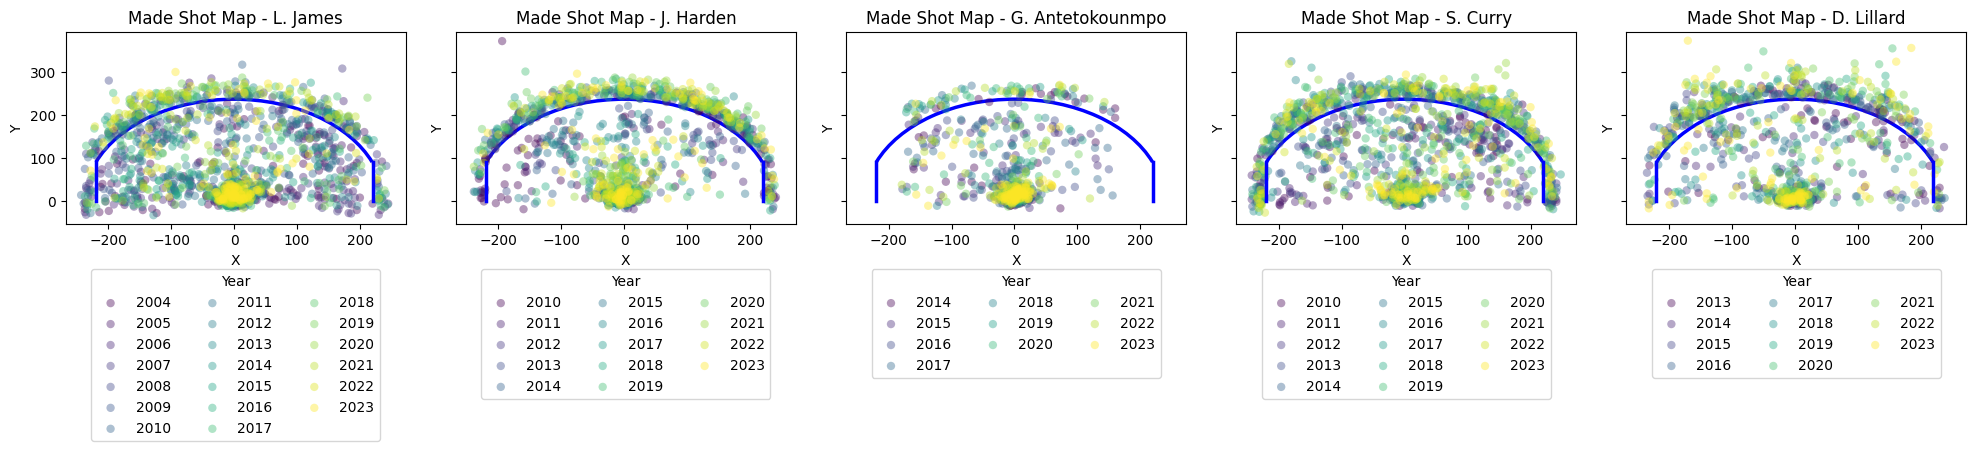

In [50]:
show_top_players(top_all_time,'top_all_time')
show_top_players(top_1997_2005,'top_1997_2005')
show_top_players(top_2006_2015,'top_2006_2015')
show_top_players(top_2016_2023,'top_2016_2023')
